## Урок 6

### Взаимосвязь величин. Параметрические и непараметрические показатели корреляции. 

### Корреляционный анализ

**Корреляция**  — математический показатель, по которому можно судить, есть ли статистическая взаимосвязь между 

случайными величинами. Если такая связь существует, изменения значений одной величины  

влияют на другую.


**Коэффициент корреляции** показывает, насколько велика взаимосвязь. Обозначается символами $R$ или $r$ и может 

принимать значения от -1 до 1 включительно.

Когда коэффициент корреляции близок к 1, между величинами наблюдается **прямая** связь:

увеличение одной величины сопровождается увеличением другой, и аналогично уменьшение одной величины

сопровождается уменьшением другой.

Если же коэффициент корреляции близок к -1, между величинами есть **обратная** корреляционная связь:

увеличение одной величины сопровождается уменьшением другой и наоборот.

Коэффициент корреляции, близкий к 0, говорит о том, что между величинами **нет связи**,

то есть изменение величин происходит независимо друг от друга, либо есть только нелинейная взаимосвязь.

**Пример 1**

Посчитаем корреляцию роста с весом хоккеистов из рассмотренного ранее датасета.

In [8]:
import numpy as np
import pandas as pd

In [9]:
df = pd.read_csv('hockey_players.csv', encoding='cp1251', parse_dates=['birth'])
df = df.drop_duplicates(['name', 'birth'])

In [10]:
df.describe()

,year,no,height,weight,age,cohort,bmi
count,3294.000000,3294.000000,3294.000000,3294.000000,3294.000000,3294.000000,3294.000000
mean,2006.860959,28.520036,183.829387,87.464633,26.379341,1980.365513,25.865320
std,4.453502,22.776900,5.467629,7.043294,4.247066,6.802670,1.498745
min,2001.000000,1.000000,165.000000,65.000000,17.642710,1963.000000,19.460881
25%,2004.000000,12.000000,180.000000,83.000000,23.245038,1975.000000,24.901982
50%,2006.000000,23.000000,184.000000,87.000000,25.895962,1980.000000,25.811182
75%,2010.000000,37.000000,188.000000,92.000000,29.135524,1985.000000,26.861207
max,2016.000000,98.000000,205.000000,117.000000,41.505818,1998.000000,30.930438


Для этого воспользуемся методом **corr ** из библиотеки **pandas**:

In [11]:
corr_matrix = df.loc[:, ['height', 'weight']].corr()
corr_matrix

,height,weight
height,1.000000,0.693731
weight,0.693731,1.000000


Мы получили матрицу корреляций. Корреляция между ростом и весом достаточно высока и имеет величину, почти равную 0.7:

In [12]:
corr_matrix.loc['height', 'weight']

0.6937305679663011

Величина корреляции положительна, так что можно сделать вывод, что чем выше рост хоккеиста, тем, как правило, больше его вес.

#### Взаимосвязь величин

Если две величины коррелируют, это может свидетельствовать о наличии **статистической связи** между ними. Причем говорить о ней 

мы можем для величин из одной выборки, что не гарантирует того, что подобная связь встретится и в другой выборке и 

должна будет иметь такую же природу. 

Корреляционный анализ просто интерпретируется, поэтому статистик может сделать ложный вывод о том, что между этими признаками 

существует причинно-следственная связь. Такой вывод нельзя делать на основании коэффициента корреляции — можно лишь сказать, 

что между признаками есть статистическая взаимосвязь.

Например, если рассмотреть данные о пожарах в городе, можно увидеть, что между материальными потерями, вызванными 

пожаром, и количеством пожарных, которые принимали участие в его тушении, есть сильная корреляция.

При этом ложным будет вывод о том, что большое количество пожарных, присутствующих на пожаре, приводит к увеличению ущерба от него. Он может привести к неправильному решению — уменьшить бригаду пожарных, чтобы сократить материальные потери.

Еще один пример того, как коррелирующие величины могут направить статистика по ложному следу: в городах с 

повышенным уровнем преступности зачастую количество полицейских тоже велико. Между количеством полицейских и преступностью есть 

положительная корреляция. Ложный вывод, который можно в таком случае сделать, —  решить, что причиной повышенной 

преступности стало увеличение штата полицейских, и сократить часть правоохранителей, чтобы снизить уровень преступности.

Если  ковариация не равна нулю, две случайные величины зависимы.

Высокая **корреляция** двух величин может свидетельствовать о том, что у них есть **общая причина** — несмотря на то, что 

прямого взаимодействия между двумя коррелирующими величинами нет. Например, наступление зимы может быть причиной и  роста 

заболеваемости простудой, и повышения расходов на отопление. Это как раз тот случай, когда две величины (число 

заболевших и расходы на отопление) коррелируют между собой, хотя они друг на друга напрямую не влияют.

Зато у них есть общая причина — зимний сезон.

Отсутствие корреляции между двумя величинами еще не говорит о том, что между показателями нет связи. 

Вполне возможно, что между признаками есть нелинейная зависимость, которую не может уловить коэффициент корреляции.

**Показатели корреляции**

В зависимости от характера переменных можно выбрать подходящий метод вычисления коэффициента корреляции.

Для интервальных и количественных признаков используется коэффициент корреляции Пирсона ($r$), относящийся 

к параметрическим показателям корреляции. Если хотя бы один из двух признаков — порядковый 

или его распределение не является нормальным, применяют ранговую корреляцию Спирмена или $\tau$ (тау) Кендалла — 

непараметрические показатели корреляции. 

**Ковариация**

Ковариация, или корреляционный момент — параметрический показатель, позволяющий судить о совместном распределении 

двух признаков. Равна математическому ожиданию произведения отклонений случайных величин:

$$cov_{XY} = M[(X - M(X))(Y - M(Y))] = M(XY) - M(X)M(Y)=\overline{X \cdot Y} - \overline{X} \cdot \overline{Y}$$

```
# Выбран кодовый формат
```



In [13]:
MH = df['height'].mean()
MW = df['weight'].mean()
mean_list = []
for h, w in zip(df['height'], df['weight']):
    mean_list.append((h-MH)*(w-MW))
cov = sum(mean_list) / len(mean_list)
print(cov)

26.707535992102372


In [14]:
print(df['height'].std()**2)
print(df['height'].var())

29.894963668771002
29.894963668771


In [15]:
pear = cov / (df['height'].std() * df['weight'].std())
print(pear)

0.6935199636651666


где $M$ — математическое ожидание, $\overline{X} \: и \:\overline{Y}$ — среднее значение выборок.

Размерность ковариации, которая равна произведению размерности случайных величин, имеет их масштаб, 

то есть величина ковариации зависит от единиц измерения независимых величин. В связи с этим ковариацию затруднительно 

применять для корреляционного анализа.

Зная ковариацию и среднее квадратичное отклонение каждого из двух признаков, можно вычислить коэффициент корреляции Пирсона:

$$r_{XY} = \frac{cov_{XY}}{\sigma_{X}\sigma_{Y}}$$

**Корреляционный анализ**

Корреляционный анализ — метод обработки статистических данных, благодаря которому можно определить тесноту связи между

несколькими показателями. Корреляционный анализ имеет тесную связь с регрессионным. Такой анализ принято называть 

корреляционно-регрессионным — используя его, можно определять включение и исключение показателей в уравнение 

множественной регрессии. А применяя коэффициент детерминации — проводить оценку полученного уравнение регрессии на соответствие 

выявленным связям.

**Ограничения корреляционного анализа**

Рассмотрим следующие ограничения корреляционного анализа:

1. Чтобы применять корреляционный анализ, требуется большое количество наблюдений.


2. Совокупность факторных признаков и результирующего признака должна иметь многомерное нормальное распределение.


3. Несмотря на простоту и наглядность метода, он не позволяет точно установить наличие причинно-следственной связи.

Корреляционный анализ используется во многих сферах: экономике, астрофизике, психологии, политологии и социологии.
    
Данный метод обработки информации популярен, так как прост в расчете и интерпретации,

удобен при обработке статистической информации.

## ДЗ

№1 Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):

zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],

ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].

Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy

Полученные значения должны быть равны.

Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков,
а затем с использованием функций из библиотек numpy и pandas.

In [16]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

MZP = zp.mean()
MKS = ks.mean()
mean_list = []
for z, k in zip(zp, ks):
    mean_list.append((z-MZP)*(k-MKS))
cov = sum(mean_list) / len(mean_list)
print(cov)

pear = cov / (zp.std() * ks.std())
print(pear)
print(np.corrcoef(zp, ks))

9157.84
0.8874900920739162
[[1.         0.88749009]
 [0.88749009 1.        ]]


№2 Измерены значения IQ выборки студентов,
обучающихся в местных технических вузах:

131, 125, 115, 122, 131, 115, 107, 99, 125, 111.

Известно, что в генеральной совокупности IQ распределен нормально.

Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [27]:
from scipy import stats
%matplotlib inline

In [19]:
IQ = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])
conf_int = stats.t.interval(0.95, len(IQ)-1, IQ.mean(), stats.sem(IQ))
print(conf_int)

(110.55608365158724, 125.64391634841274)


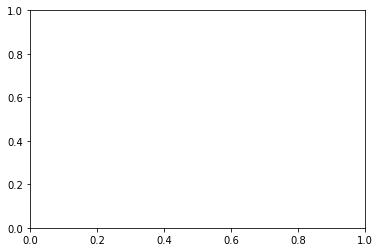

In [44]:
from scipy.stats import t
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [45]:
df = 30
mean, var, skew, kurt = t.stats(df, moments='mvsk')

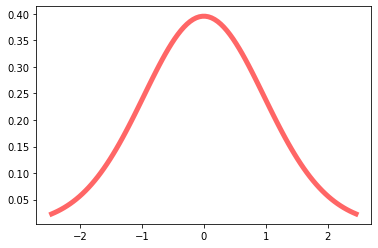

In [46]:
x = np.linspace(t.ppf(0.01, df),
                t.ppf(0.99, df), 100)
ax.plot(x, t.pdf(x, df),
       'r-', lw=5, alpha=0.6, label='t pdf')
fig

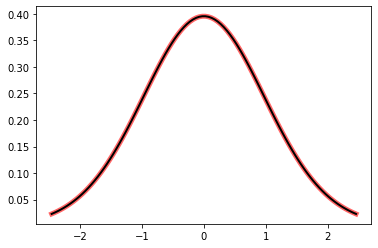

In [47]:
rv = t(df)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
fig

In [48]:
vals = t.ppf([0.001, 0.5, 0.999], df)
np.allclose([0.001, 0.5, 0.999], t.cdf(vals, df))

True

In [49]:
vals

array([-3.38518487e+00,  6.69352730e-17,  3.38518487e+00])

In [50]:
t.cdf(vals,df)

array([0.001, 0.5  , 0.999])

In [56]:
r = t.rvs(df, size=1000)

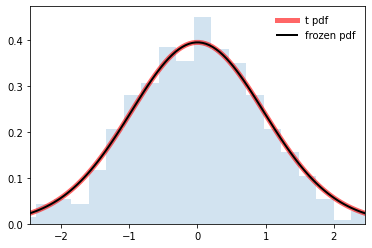

In [54]:
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
fig

№3 Известно, что рост футболистов в сборной распределен нормально
с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27,
среднее выборочное составляет 174.2. Найдите доверительный интервал для математического
ожидания с надежностью 0.95.

In [63]:
norm_intervals = stats.t.interval(0.95, 27, loc=174.2, scale=5)
print(norm_intervals)

(163.94084741759858, 184.4591525824014)


№4 Выберите тему для проектной работы по курсу Теории вероятностей и математической статистики
и напишите ее в комментарии к Практическому заданию.